In [26]:
import numpy as np     #只需要下载numpy库即可
import GridWorld_v1
import copy

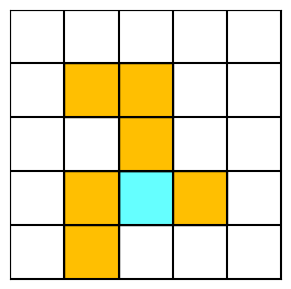

In [27]:
gamma = 0.9   #折扣因子，越接近0越近视
rows = 5      #记得行数和列数这里要同步改
columns = 5
# gridworld = GridWorld_v1.GridWorld_v1(rows=rows, columns=columns, forbiddenAreaNums=4, targetNums=2, seed = random.randint(1,1000))
# gridworld = GridWorld_v1.GridWorld_v1(desc = [".#",".T"])             #赵老师4-1的例子
# gridworld = GridWorld_v1.GridWorld_v1(desc = ["##.T","...#","...."])  #随便弄的例子
desc = [".....",".##..","..#..",".#T#.",".#..."]
gridworld = GridWorld_v1.GridWorld_v1(forbidden_area_score=-10, score=1,desc=desc) 
gridworld.show()

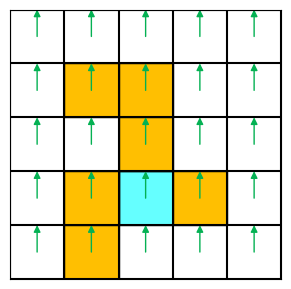

In [28]:
value = np.zeros(rows*columns).reshape(rows,columns)       #初始化可以任意，也可以全0
qtable = np.zeros((rows*columns,5)).reshape(rows,columns,5)  #初始化，这里主要是初始化维数，里面的内容会被覆盖所以无所谓
policy = np.argmax(qtable,axis=1).reshape(rows,columns)     #初始策略
gridworld.show_policy(policy)

In [29]:
policy = np.random.randint(0,5,size=(rows*columns)).reshape(rows,columns) 
#随机[0,5)的整数，代表策略
#这里其实不严谨，因为策略是可以不百分百选一个方向的，可以0.5向上，0.5向右，诸如此类。
#但先不考虑那种情况，因为画图不好画，代码实现逻辑是没差多少的

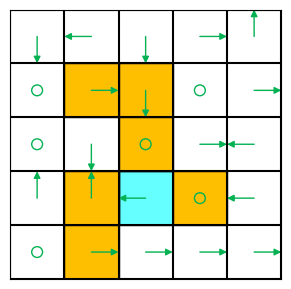

In [30]:
gridworld.show_policy(policy)

In [31]:
class PolicyIteration:
    def __init__(self,env,theta,gamma):
        self.env = env
        self.theta = theta
        self.gamma = gamma
        self.v = np.zeros((env.rows,env.columns))
        self.pi = np.random.randint(0,5,size=(env.rows,env.columns))

    def policy_evaluation(self):
        while True:
            new_v = np.zeros((rows, columns))
            max_diff = 0
            cnt = 1
            for i in range(rows):
                for j in range(columns):
                    a = self.pi[i][j]
                    next_state, reward, done = self.env.step([i, j], a)
                    new_v[i][j] = reward + self.gamma * self.v[next_state[0], next_state[1]]
                    max_diff = max(max_diff, abs(new_v[i][j] - self.v[i][j]))
            cnt += 1
            self.v = new_v
            if max_diff < self.theta:
                print("policy evaluation iteration times = :", cnt)
                break

    def policy_improvement(self):
        for i in range(rows):
            for j in range(columns):
                q = np.zeros(5)
                for a in range(5):
                    next_state, reward, done = self.env.step([i, j], a)
                    q[a] = reward + self.gamma * self.v[next_state[0], next_state[1]]
                new_a = np.argmax(q)
                self.pi[i][j] = new_a
        return self.pi

    def policy_iteration(self):
        while True:
            self.policy_evaluation()
            old_pi = copy.deepcopy(self.pi)
            new_pi = self.policy_improvement()
            self.env.show_policy(self.pi)
            if np.all(old_pi == new_pi):
                break


policy evaluation iteration times = : 2


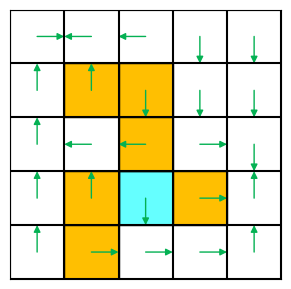

policy evaluation iteration times = : 2


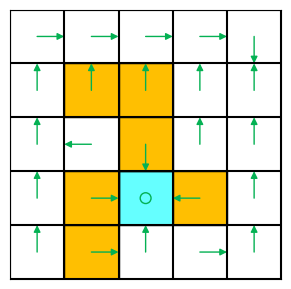

policy evaluation iteration times = : 2


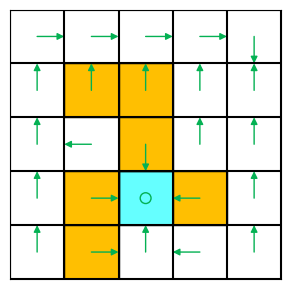

policy evaluation iteration times = : 2


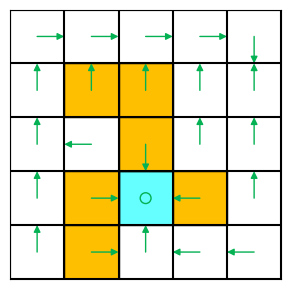

policy evaluation iteration times = : 2


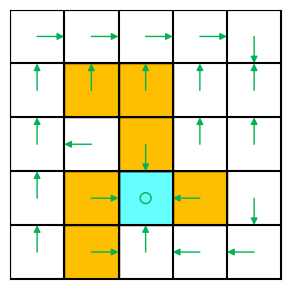

policy evaluation iteration times = : 2


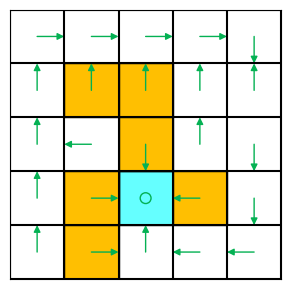

policy evaluation iteration times = : 2


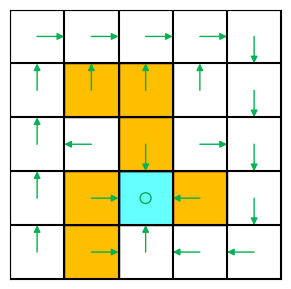

policy evaluation iteration times = : 2


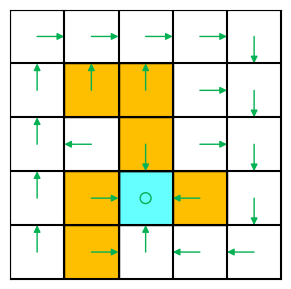

policy evaluation iteration times = : 2


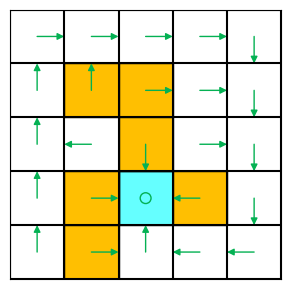

policy evaluation iteration times = : 2


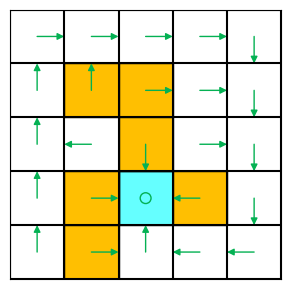

In [32]:
theta = 0.001
gamma = 0.9
agent = PolicyIteration(gridworld, theta, gamma)
agent.policy_iteration()

In [33]:
print("value sum = ", np.sum(agent.v))

value sum =  150.42277168285267
